### Membuat Multi-Line Chart

In [1]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Baca Dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

In [3]:
# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

In [4]:
# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

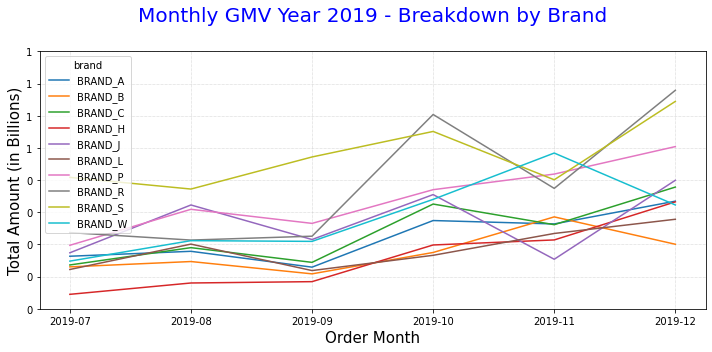

In [5]:
# Buat Multi-Line Chart
dataset.groupby(['order_month', 'brand'])['gmv'].sum().unstack().plot()

# Buat Judul Chart
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center', pad=30, fontsize=20, color='blue')

#Buat Label Sumbu X Chart
plt.xlabel('Order Month', fontsize=15)

#Buat Label Sumbu Y Chart
plt.ylabel('Total Amount (in Billions)', fontsize=15)

#Buat Grid 
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

#Menentukan Batas Minimum Sumbu Y Chart
plt.ylim(ymin=0)

#Kustomisasi Axis Ticks
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))

plt.gcf().set_size_inches(10, 5)
plt.tight_layout()

plt.show()

### Kustomisasi Legend

In [6]:
#Import Library yang diperlukan
import matplotlib.pyplot as plt

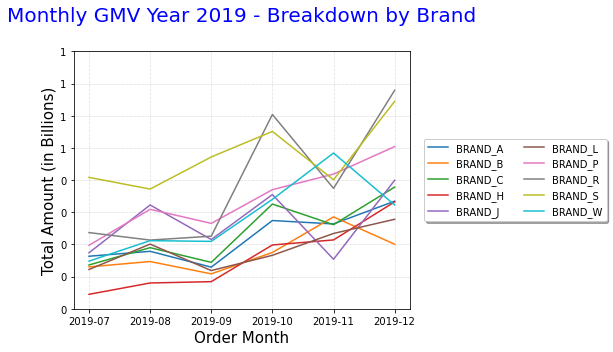

In [7]:
# Buat Multi-Line Chart
dataset.groupby(['order_month', 'brand'])['gmv'].sum().unstack().plot()

# Buat Judul Chart
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center', pad=30, fontsize=20, color='blue')

#Buat Label Sumbu X Chart
plt.xlabel('Order Month', fontsize=15)

#Buat Label Sumbu Y Chart
plt.ylabel('Total Amount (in Billions)', fontsize=15)

#Buat Grid 
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

#Menentukan Batas Minimum Sumbu Y Chart
plt.ylim(ymin=0)

#Kustomisasi Axis Ticks
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))

#Kustomisasi Legend
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)

plt.gcf().set_size_inches(10, 5)
plt.tight_layout()

plt.show()

### Kustomisasi Colormap

In [8]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

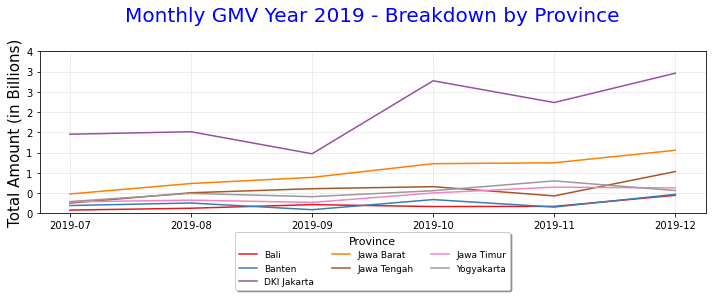

In [9]:
plt.clf()

# Buat Multi-Line Chart dan Kustomisasi Colormap
dataset.groupby(['order_month', 'province'])['gmv'].sum().unstack().plot(cmap='Set1')

# Buat Judul Chart
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center', pad=30, fontsize=20, color='blue')

#Buat Label Sumbu X Chart
plt.xlabel('Order Month', fontsize=15)

#Buat Label Sumbu Y Chart
plt.ylabel('Total Amount (in Billions)', fontsize=15)

#Buat Grid 
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

#Menentukan Batas Minimum Sumbu Y Chart
plt.ylim(ymin=0)

#Kustomisasi Axis Ticks
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))

#Kustomisasi Legend
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3, title='Province', fontsize=9, title_fontsize=11)

plt.gcf().set_size_inches(10, 5)
plt.tight_layout()

plt.show()

### Membuat Line Chart GMV Breakdown by Top Provinces

In [10]:
#Membuat Variabel top_provinces yang berisi lima provinsi dengan nilai GMV tertinggi.
top_provinces = (dataset.groupby('province')['gmv']
                 .sum()
                 .reset_index()
                 .sort_values(by='gmv',ascending=False)
                 .head(5))

print(top_provinces)

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


In [11]:
#Membuat Kolom Baru pada Dataset yang bernama (province_top) dengan menggunakan function apply & lambda.
dataset['province_top'] = dataset['province'].apply(
    lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

#### Kemudian, setelah memiliki kolom baru, grafiknya bisa di update. Sebagai catatan, untuk mengubah ukuran figure, juga bisa menggunakan function plt.gcf().set_size_inches yang diletakkan di akhir code, sebelum plt.show(). 

In [12]:
# Import Library
import matplotlib.pyplot as plt

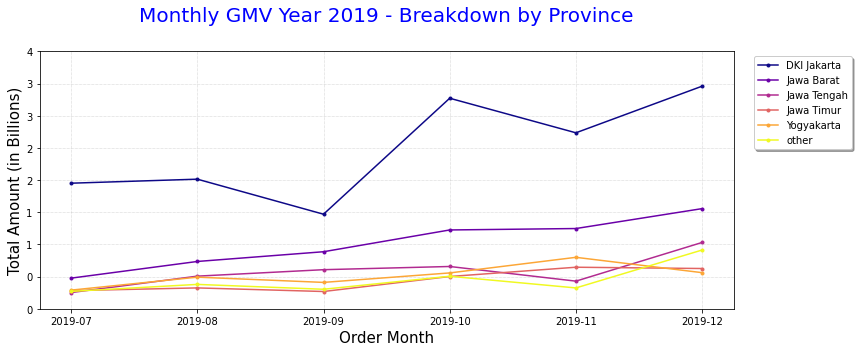

In [13]:
# Plot Multi Line Chart dan Kustomisasinya
dataset.groupby(['order_month', 'province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')

# Buat Judul Chart
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center', pad=30, fontsize=20, color='blue')

#Buat Label Sumbu X Chart
plt.xlabel('Order Month', fontsize=15)

#Buat Label Sumbu Y Chart
plt.ylabel('Total Amount (in Billions)', fontsize=15)

#Buat Grid 
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

#Menentukan Batas Minimum Sumbu Y Chart
plt.ylim(ymin=0)

#Kustomisasi Axis Ticks
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))

#Kustomisasi Legend
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)

plt.gcf().set_size_inches(12, 5)
plt.tight_layout()

plt.show()

### Membuat Anotasi

In [14]:
import matplotlib.pyplot as plt

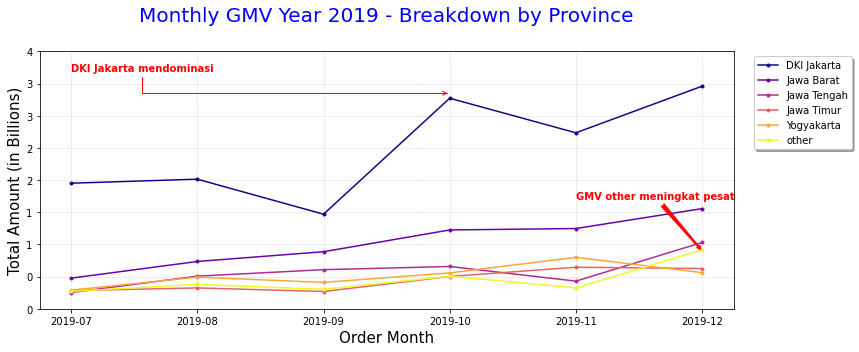

In [15]:
# Plot Multi Line Chart dan Kustomisasinya
dataset.groupby(['order_month', 'province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')

# Buat Judul Chart
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center', pad=30, fontsize=20, color='blue')

#Buat Label Sumbu X Chart
plt.xlabel('Order Month', fontsize=15)

#Buat Label Sumbu Y Chart
plt.ylabel('Total Amount (in Billions)', fontsize=15)

#Buat Grid 
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

#Menentukan Batas Minimum Sumbu Y Chart
plt.ylim(ymin=0)

#Kustomisasi Axis Ticks
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))

#Kustomisasi Legend
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)

#Anotasi Pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000), 
             xytext=(4, 1700000000), 
             weight='bold', 
             color='red', 
             arrowprops=dict(arrowstyle='fancy', 
                             connectionstyle="arc3", 
                             color='red'))

#Anotasi Kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000), 
             xytext=(0, 3700000000), 
             weight='bold', 
             color='red', 
             arrowprops=dict(arrowstyle='->', 
                             connectionstyle="angle", 
                             color='red'))

plt.gcf().set_size_inches(12, 5)
plt.tight_layout()

plt.show()

## Membuat Pie-Chart dan Bar-Chart

### Membuat Subset Data
#### Data yang digunakan pada bulan Oktober sampai Desember 2019 atau Quartil 4

In [16]:
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

In [17]:
print(dataset_dki_q4.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   
6   1711399  2019-11-04        16791    Jakarta Barat  DKI Jakarta      P0860   

     brand  quantity  item_price order_month      gmv province_top  
0  BRAND_J        10      740000     2019-10  7400000  DKI Jakarta  
1  BRAND_R         2      604000     2019-10  1208000  DKI Jakarta  
2  BRAND_C         8     1045000     2019-11  8360000  DKI Jakarta  
4  BRAND_R         2     4475000     2019-10  8950000  DKI Jakarta  
6  BRAND_C         1     1465000     2019-11  1465000  DKI Jakarta  


### Membuat Pie Chart

In [18]:
import matplotlib.pyplot as plt

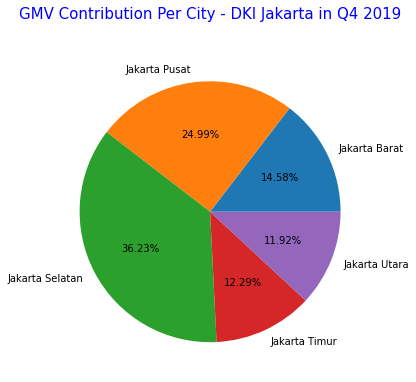

In [19]:
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()

plt.figure(figsize=(6,6))

plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'], autopct='%1.2f%%')

plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019',loc='center', pad=30, fontsize=15, color='blue')

plt.show()

### Membuat Bar Chart

In [20]:
import matplotlib.pyplot as plt

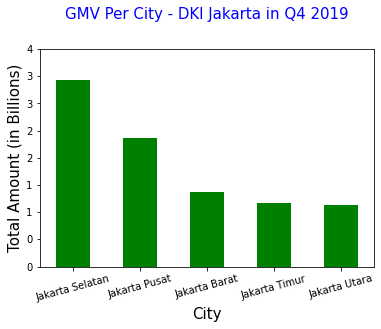

In [23]:
plt.clf()

dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')

plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')

plt.xlabel('City', fontsize=15)

plt.ylabel('Total Amount (in Billions)', fontsize = 15)

plt.ylim(ymin = 0)

labels, locations = plt.yticks()

plt.yticks(labels, (labels/1000000000).astype(int))

plt.xticks(rotation=15)

plt.show()

### Membuat Multi-bar Chart

In [25]:
import matplotlib.pyplot as plt

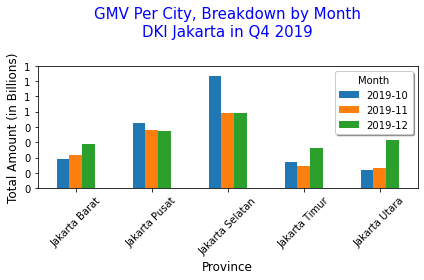

In [28]:
dataset_dki_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack().plot(kind='bar')

plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')

plt.xlabel('Province', fontsize=12)

plt.ylabel('Total Amount (in Billions)', fontsize=12)

plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')

plt.ylim(ymin=0)

labels, locations = plt.yticks()

plt.yticks(labels, (labels/1000000000).astype(int))

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()